In [1]:
import pandas as pd
import datetime

In [2]:
d= datetime.date(2000,9,17)
print(d)
print(type(d))

2000-09-17
<class 'datetime.date'>


In [3]:
# Creating a Timestamp object
timestamp = pd.Timestamp('2023-10-04 15:30:00')
# Extracting the year from the Timestamp
year = timestamp.year
# Printing the extracted year
print(year)
# Extracting the month from the Timestamp
month = timestamp.month
# Printing the extracted month
print(month)
# Extracting the day from the Timestamp
day = timestamp.day
# Printing the extracted day
print(day)
# Extracting the hour from the Timestamp
hour = timestamp.hour
# Printing the extracted hour
print(hour)
# Extracting the minute from the Timestamp
minute = timestamp.minute
# Printing the extracted minute
print(minute)
# Extracting the weekday from the Timestamp
weekday = timestamp.weekday()
# Printing the extracted weekday
print(weekday)
# Extracting the quarter from the Timestamp
quarter = timestamp.quarter
# Printing the extracted quarter
print(quarter)

2023
10
4
15
30
2
4


In [4]:
# Creating a date offset object
date_offset = pd.DateOffset(years=2, months=3, days=10)
# Adding the date offset to a Timestamp
new_timestamp = timestamp + date_offset
# Printing the new Timestamp
print(new_timestamp)

2026-01-14 15:30:00


In [5]:
datetime.date.today()

datetime.date(2025, 1, 26)

In [6]:
datetime.datetime.now()

datetime.datetime(2025, 1, 26, 21, 18, 59, 983595)

In [7]:
today = datetime.datetime.today() 
print(today.strftime("%d/%m/%Y %H:%M:%S"))

26/01/2025 21:18:59


In [8]:
now = datetime.datetime.now()
then = datetime.datetime(2020, 5, 26)
# Кол-во времени между датами.
delta = now - then
print(delta.days)
print(delta.seconds)

1706
76740


In [9]:
total_seconds = delta.total_seconds()
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60
print(hours, minutes, seconds)

40965.0 19.0 0.005971997976303101


In [10]:
import time
 
for x in range(3):
    time.sleep(1)
    print("Slept for 1 seconds")

Slept for 1 seconds
Slept for 1 seconds
Slept for 1 seconds


In [11]:
a = time.strftime("%Y-%m-%d-%H.%M.%S", time.localtime())
print(a)

2025-01-26-21.19.03


,IE_ID
IP_PROP5562,
2019-08-29,8
2019-08-30,8
2019-08-31,1
2019-09-01,0
2019-09-02,12
...,...
2019-11-04,36
2019-11-05,103
2019-11-06,106


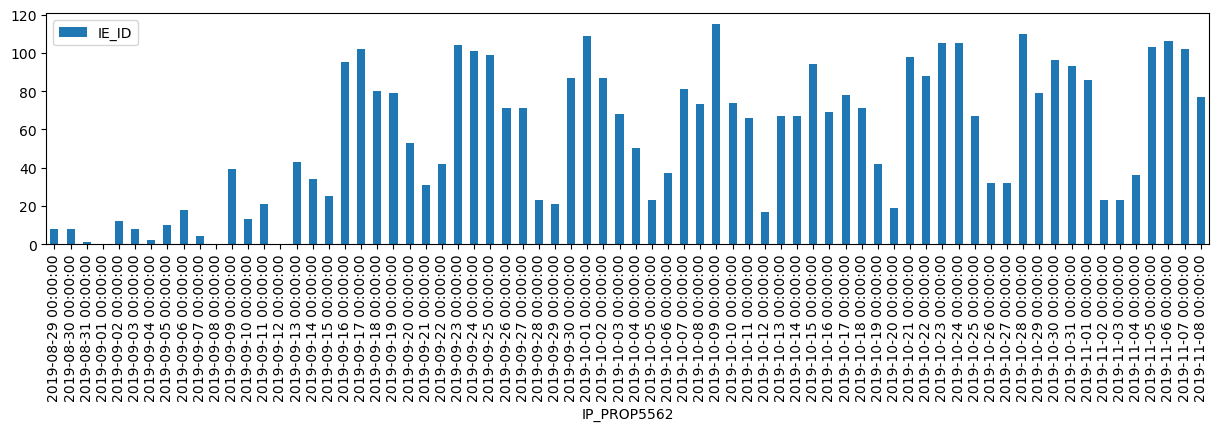

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.use('TkAgg') # вывод в отдельном окне


# Способ 2 через  df.resample('1d'). Пропусков не будет, будут дни с 0, несмотря на отсутсвтие событий !!!
df = pd.read_csv('data/export.csv', sep=';')

# Преобразуем строковую_дату_время в дату_время методом пандас
df['IP_PROP5562'] = pd.to_datetime(df['IP_PROP5562'], format='%d.%m.%Y %H:%M:%S')

# Устанавливаем поле как индекс
df.set_index('IP_PROP5562', inplace=True)  # inplace=True !!! или создавать новый датафрейм, иначе не работало

# Пересобираем/считаем по дате с интервалом 1 день. Поле индекс_дата_время цепляется автоматом.
res_df = df.resample('1d').count()

res_df.plot(kind='bar', figsize=(15, 3))
display(res_df)
plt.plot(res_df)
plt.show(block=True)
plt.close()